# Import Required Libraries
This cell imports all the necessary Python libraries for data analysis and visualization, including pandas, seaborn, numpy, plotly, matplotlib, and scipy.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Add Genre Columns to Movies DataFrame
This cell defines a function that adds binary columns for each unique genre to the movies DataFrame, enabling genre-based analysis.

In [2]:
def handle_category_genre(movies):
    """
    Adds binary columns for each unique genre to the movies DataFrame.
    Args:
        movies (pd.DataFrame): DataFrame with a 'Genre' column.
    Returns:
        pd.DataFrame: DataFrame with genre columns added.
    """
    genre_lists = movies['Genre'].dropna().apply(lambda x: x.split(', '))
    unique_genres = sorted(set(genre for sublist in genre_lists for genre in sublist))
    for genre in unique_genres:
        movies[genre] = movies['Genre'].apply(lambda x: int(genre in x.split(', ')) if pd.notna(x) else 0)
    return movies

In [3]:


def safe_to_float(x):
    """
    Safely converts input to float, handling commas and invalid values.
    Args:
        x: Input value.
    Returns:
        float or np.nan
    """
    try:
        return float(str(x).replace(',', ''))
    except:
        return np.nan

In [4]:


def draw_hist(col,n_bins):
    """
    Draws a histogram for a specified column in the movies DataFrame.
    Args:
        col (str): Column name.
        n_bins (int): Number of bins.
    """
    # Assuming 'movies' is your DataFrame and it has a 'Duration' column
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(movies[col], bins=n_bins, kde=True, color='skyblue', edgecolor='black')
    plt.title("Distribution of Movie "+col, fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Number of Movies", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

### List of Genre Columns
This cell lists all unique genre names found in the dataset, which will be used for genre-based analysis and visualizations.

In [5]:

genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
                 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
                 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

In [6]:

def draw_genre_counts(genre_columns):
    """
    Plots total number of movies per genre as a bar chart.
    Args:
        genre_columns (list): List of genre column names.
    """
    # Count total number of movies per genre
    genre_totals = movies[genre_columns].sum()

     
    # Convert to DataFrame
    df_genres = pd.DataFrame(list(genre_totals.items()), columns=['Genre', 'Count'])

    # Create bar chart
    fig = px.bar(df_genres, x='Genre', y='Count',
                 title='Total Number of Movies per Genre',
                 labels={'Count': 'Number of Movies'},
                 text='Count')

    # Show the chart
    fig.show()
    fig.write_html(data_path + "my_html.html")
    

In [7]:

  
    
def draw_votes_rating_scatter():
    """
    Plots a scatter plot of movie ratings vs votes.
    """
    plt.scatter(movies['Rating'],movies['Votes'],s=1)
    plt.title("Rating vs Votes")
    plt.xlabel("Rating")
    plt.ylabel("Votes")
    plt.show()

In [8]:

def calculate_actor_versatility(df_genre_counts):
    """
    Calculates versatility score for actors based on genre counts.
    Args:
        df_genre_counts (pd.DataFrame): Actor-genre count DataFrame.
    Returns:
        pd.Series: Versatility scores.
    """
    # Apply standard deviation calculation row-wise, ignoring zero values
    versatility_scores = df_genre_counts.apply(
        lambda row: row[row != 0].std(), axis=1
    )
    return versatility_scores

In [9]:

    
def gen_actor_genre_df(genre_columns):
    """
    Generates a DataFrame of actor vs genre counts.
    Args:
        genre_columns (list): List of genre column names.
    Returns:
        pd.DataFrame: Actor-genre count DataFrame.
    """
    actor_list=[]
    actor_list.extend(movies['Actor 1'].unique())
    actor_list.extend(movies['Actor 2'].unique())
    actor_list.extend(movies['Actor 3'].unique())
    unique_actors=list(set(actor_list))
    #len(actor_set)

    actor_genre_df = pd.DataFrame(0, index=unique_actors, columns=genre_columns)

    # Step 3: Iterate through each row in movies and update counts
    for _, row in movies.iterrows():
        actors = [row['Actor 1'], row['Actor 2'], row['Actor 3']]
        genres = row['Genre']
        
        if pd.notna(genres):
            genre_list = genres.split(', ')
            for actor in actors:
                if pd.notna(actor):
                    for genre in genre_list:
                        actor_genre_df.at[actor, genre] += 1
    return actor_genre_df

In [26]:

def draw_smoothed_graph_for_duration_trends(df):
    """
    Plots smoothed line graphs for duration trends using Gaussian filter.
    """
    # Assuming df is a DataFrame with at least 3 columns
    plt.plot(range(len(df)), gaussian_filter1d(df[0], sigma=2), label='Old')
    plt.plot(range(len(df)), gaussian_filter1d(df[1], sigma=2), label='Old Best')
    plt.plot(range(len(df)), gaussian_filter1d(df[2], sigma=2), label='New')

    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Multiple Line Plots')
    plt.show()

In [11]:

def duration_trends(df,year):
    """
    Calculates mean durations for old, old best, and new movies around a year.
    Args:
        df (pd.DataFrame): Movies DataFrame.
        year (int): Reference year.
    Returns:
        tuple: (old_dur_mean, old_best_dur_mean, new_dur_mean)
    """
    old_df=df[(df['Year']>=year-5)&(df['Year']<year)]
    new_df=df[(df['Year']>=year)&(df['Year']<year+4)]
    rat_mean=old_df['Rating'].mean()
    rat_std=old_df['Rating'].std()
    old_mean=rat_mean
    old_best_df=old_df[old_df['Rating']>rat_mean + 2 * rat_std]
    old_best_dur_mean=old_best_df['Duration'].mean()
    new_dur_mean=new_df['Duration'].mean()
    old_dur_mean=old_df['Duration'].mean()
    return old_dur_mean,old_best_dur_mean,new_dur_mean

In [28]:


def draw_graph_for_duration_trends():
    """
    Plots duration trends over years for movies.
    """
    duration_trend_list=[]
    for year in range(1913,2023):
        old_dur_mean,old_best_dur_mean,new_dur_mean=duration_trends(movies,year)
        duration_trend_list.append([old_dur_mean,old_best_dur_mean,new_dur_mean])
        
    duration_trend_df=pd.DataFrame(duration_trend_list)
    duration_trend_clean_df=duration_trend_df.dropna()
    df=duration_trend_clean_df
    plt.plot(range(len(df)),df[0],label="Past 5 years" )
    plt.plot(range(len(df)), df[1],label="Past 5 years best")
    plt.plot(range(len(df)) ,df[2],label="Next 5 years")
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Duration in Min')
    plt.title('Duration Trends')
    plt.show()
    return duration_trend_df

In [24]:

def draw_genre_trends(df):
    """
    Plots trends of top 6 genres over time.
    """
    # Drop rows with missing Year_clean
    df_clean = df.dropna(subset=['Year'])
    df_clean['Year'] = df_clean['Year'].astype(int)

    # Melt genre columns into long format
    df_melted = df_clean.melt(
        id_vars=['Year'],
        value_vars=genre_columns,
        var_name='Genre',
        value_name='IsGenre'
    )

    # Filter genre is present
    df_melted = df_melted[df_melted['IsGenre'] == 1]

    # Group by year and genre to get counts
    genre_year_counts = df_melted.groupby(['Year', 'Genre']).size().reset_index(name='Count')

    # Get top 6 genres overall
    top_genres = df_clean[genre_columns].sum().sort_values(ascending=False).head(6).index

    # Filter to top genres only
    filtered_counts = genre_year_counts[genre_year_counts['Genre'].isin(top_genres)]

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_counts, x='Year', y='Count', hue='Genre')
    plt.title('Top 6 Genres Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:


def draw_all_genre_vs_year():
    """
    Plots genre-wise movie counts over years.
    """
    df=movies
    # Drop rows with missing Year_clean
    df_clean = df.dropna(subset=['Year'])
    df_clean['Year_clean'] = df_clean['Year'].astype(int)

    # Group by year and count movies per genre
    genre_counts_by_year = df_clean.groupby('Year')[genre_columns].sum()

    # Plotting
    plt.figure(figsize=(16, 10))
    for genre in genre_columns:
        plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], label=genre)

    plt.title('Genre-wise Movie Counts Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [15]:

def draw_year_duration_heatmap():
    """
    Plots a heatmap of movie duration bins vs year.
    """
    df=movies
    df_clean = df.dropna(subset=['Year', 'Duration'])
    duration_bin_size = 10

    df_clean['Duration_bin'] = (df_clean['Duration'] // duration_bin_size) * duration_bin_size

    # Create pivot table for heatmap
    heatmap_data = df_clean.pivot_table(index='Duration_bin', columns='Year', aggfunc='size', fill_value=0)
    #heatmap_data=heatmap_data[:20]
    # Plot heatmap
    plt.figure(figsize=(12, 4))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='d')
    plt.title(f'Heatmap of Duration vs Year (Bin size: {duration_bin_size})')
    plt.xlabel('Year')
    plt.ylabel(f'Duration (binned by {duration_bin_size})')
    plt.tight_layout()
    plt.show()


### Load and Inspect Movie Dataset
This cell loads the movie dataset from a CSV file and displays the first few rows and summary statistics to provide an overview of the data.

In [ ]:


data_path="" #Add your path here
movies = pd.read_csv(data_path+'//IMDb_Movies_India.csv', sep=',',encoding='latin1')
movies.head()
movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Data Cleaning and Transformation
This cell cleans and transforms the movie dataset by converting columns to numeric types, handling invalid values, creating genre columns, and adding a log-transformed votes column for further analysis.

In [17]:
movies['Duration'] = pd.to_numeric(movies['Duration'].str.replace('min', '').str.strip(), errors='coerce')
movies['Year'] = pd.to_numeric(movies['Year'].str.replace(r"[()]", "", regex=True), errors='coerce')
#movies['Votes'] = movies['Votes'].apply(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else np.nan)
invalid_votes = movies['Votes'][movies['Votes'].apply(
    lambda x: not pd.isnull(x) and not str(x).replace(',', '').replace('.', '').isdigit()
)]

movies['Votes'] = movies['Votes'].apply(safe_to_float)
movies=handle_category_genre(movies)
movies['LogVotes'] = np.log1p(movies['Votes'])


### Visualize Feature Distributions
This cell draws histograms for movie Duration, Rating, and LogVotes to visualize their distributions and identify patterns or outliers in the dataset.

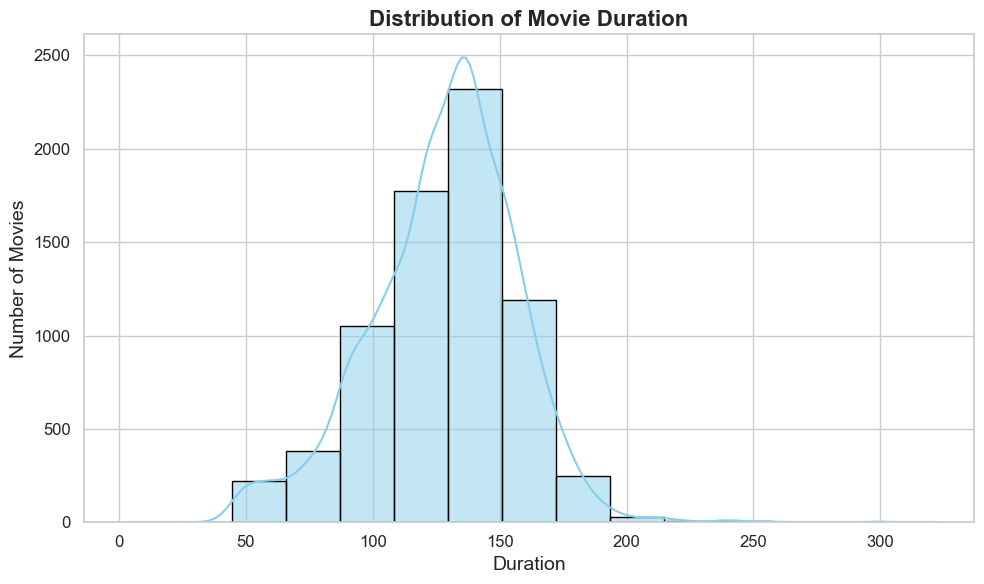

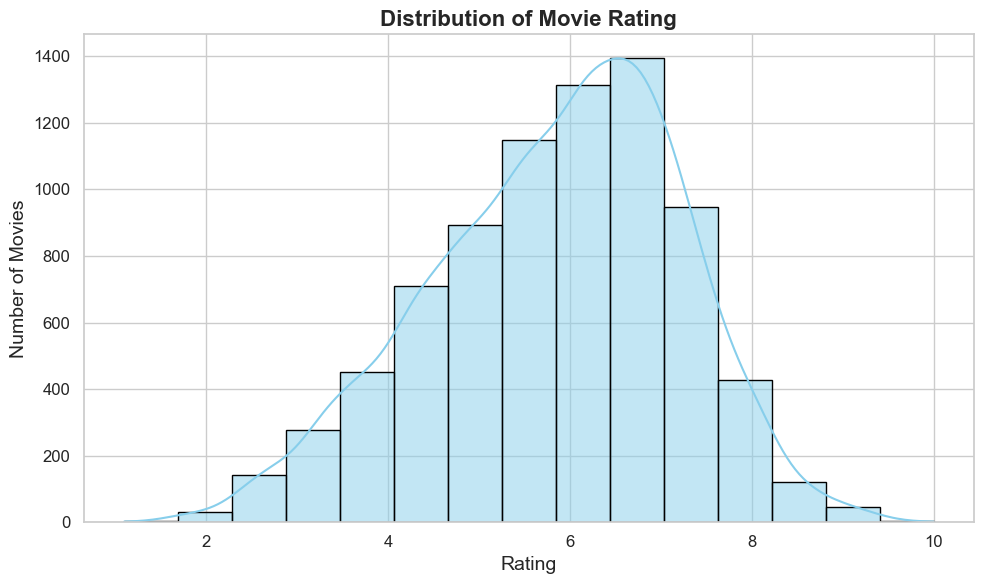

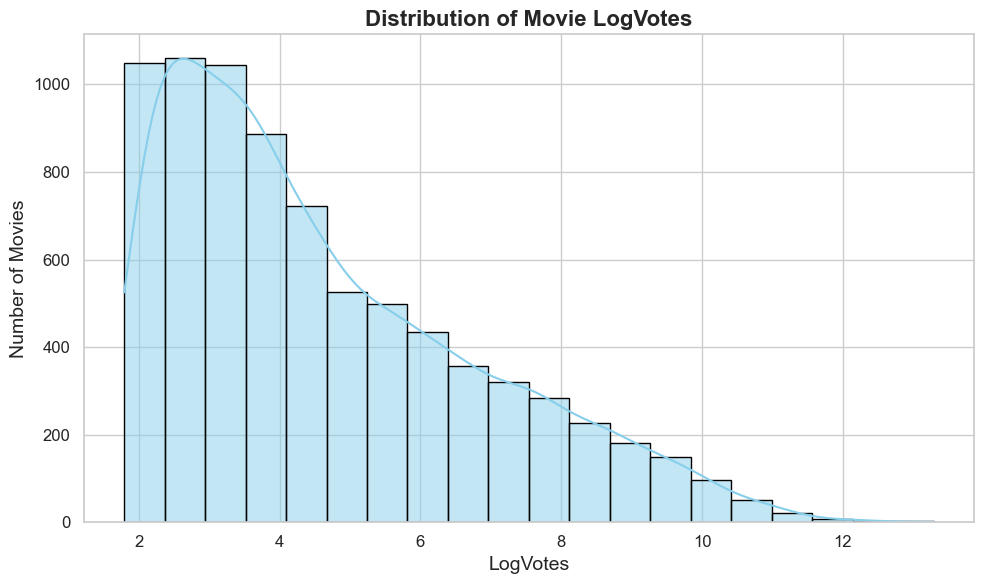

In [18]:
col='Duration'
draw_hist(col,15)
col='Rating'
draw_hist(col,15)
col='LogVotes'
draw_hist(col,20)

### Visualize Genre Popularity and Rating-Votes Relationship
This cell visualizes the total number of movies per genre and plots the relationship between movie ratings and votes to explore trends and correlations in the dataset.

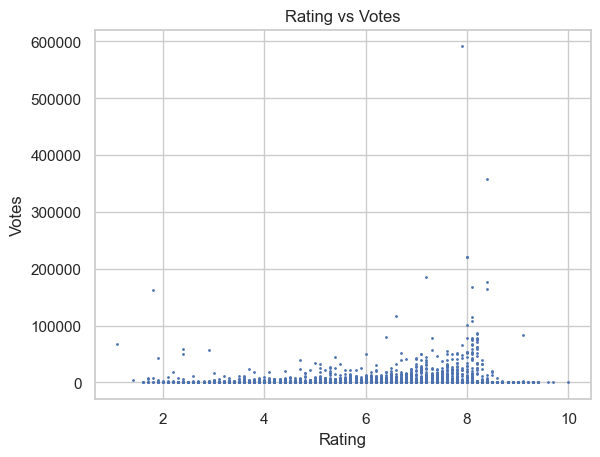

In [19]:
draw_genre_counts(genre_columns)
draw_votes_rating_scatter()

### Analyze Actor Versatility Across Genres
This cell generates a DataFrame of actor-genre counts and exports the number of genres each actor has appeared in, helping to identify versatile actors in the dataset.

In [20]:
actor_genre_df=gen_actor_genre_df(genre_columns)
non_zero_counts = (actor_genre_df != 0).sum(axis=1)
non_zero_counts.sort_values(ascending=False)[:10]
non_zero_counts.to_excel(data_path+"nn_zero_count.xlsx")

### Identify Less Versatile Actors
This cell counts the number of movies for each actor and exports those with high movie counts but low genre diversity, helping to highlight less versatile actors in the dataset.

In [21]:
all_actors = pd.concat([movies['Actor 1'], movies['Actor 2'], movies['Actor 3']])
movie_counts = all_actors.value_counts()
movie_counts[movie_counts>50].sort_values(ascending=False).to_excel(data_path+"less_versatile.xlsx")

### Calculate and Export Actor Versatility Scores
This cell calculates versatility scores for actors based on their genre diversity and exports the most versatile actors, helping to highlight those with a wide range of roles.

In [22]:
versatility = calculate_actor_versatility(actor_genre_df)
print(versatility)
versatility[movie_counts[movie_counts>50].index].sort_values(ascending=False).to_excel(data_path+"sd_versatile.xlsx")

Auroshika Dey        0.500000
Prakash Belawadi          NaN
Tanya Singh               NaN
Akshat Jain          0.000000
Jogi Brothers        0.000000
                       ...   
Chethan                   NaN
Lada Lucky                NaN
Rashid Khan          0.353553
Mike Hussey          0.000000
Fairy Priya Ahmed         NaN
Length: 10289, dtype: float64


### Explore Movie Trends and Genre Patterns
This cell generates visualizations to explore trends in movie duration, genre popularity, and duration distributions over time, providing insights into how Indian cinema has evolved.

C:\Users\Ashish.Pandit\AppData\Local\Temp\ipykernel_36060\1076803686.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



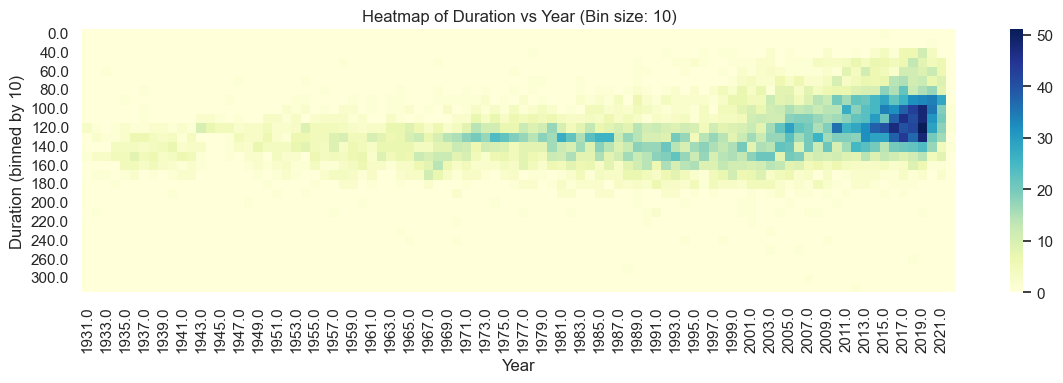

C:\Users\Ashish.Pandit\AppData\Local\Temp\ipykernel_36060\3175082538.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



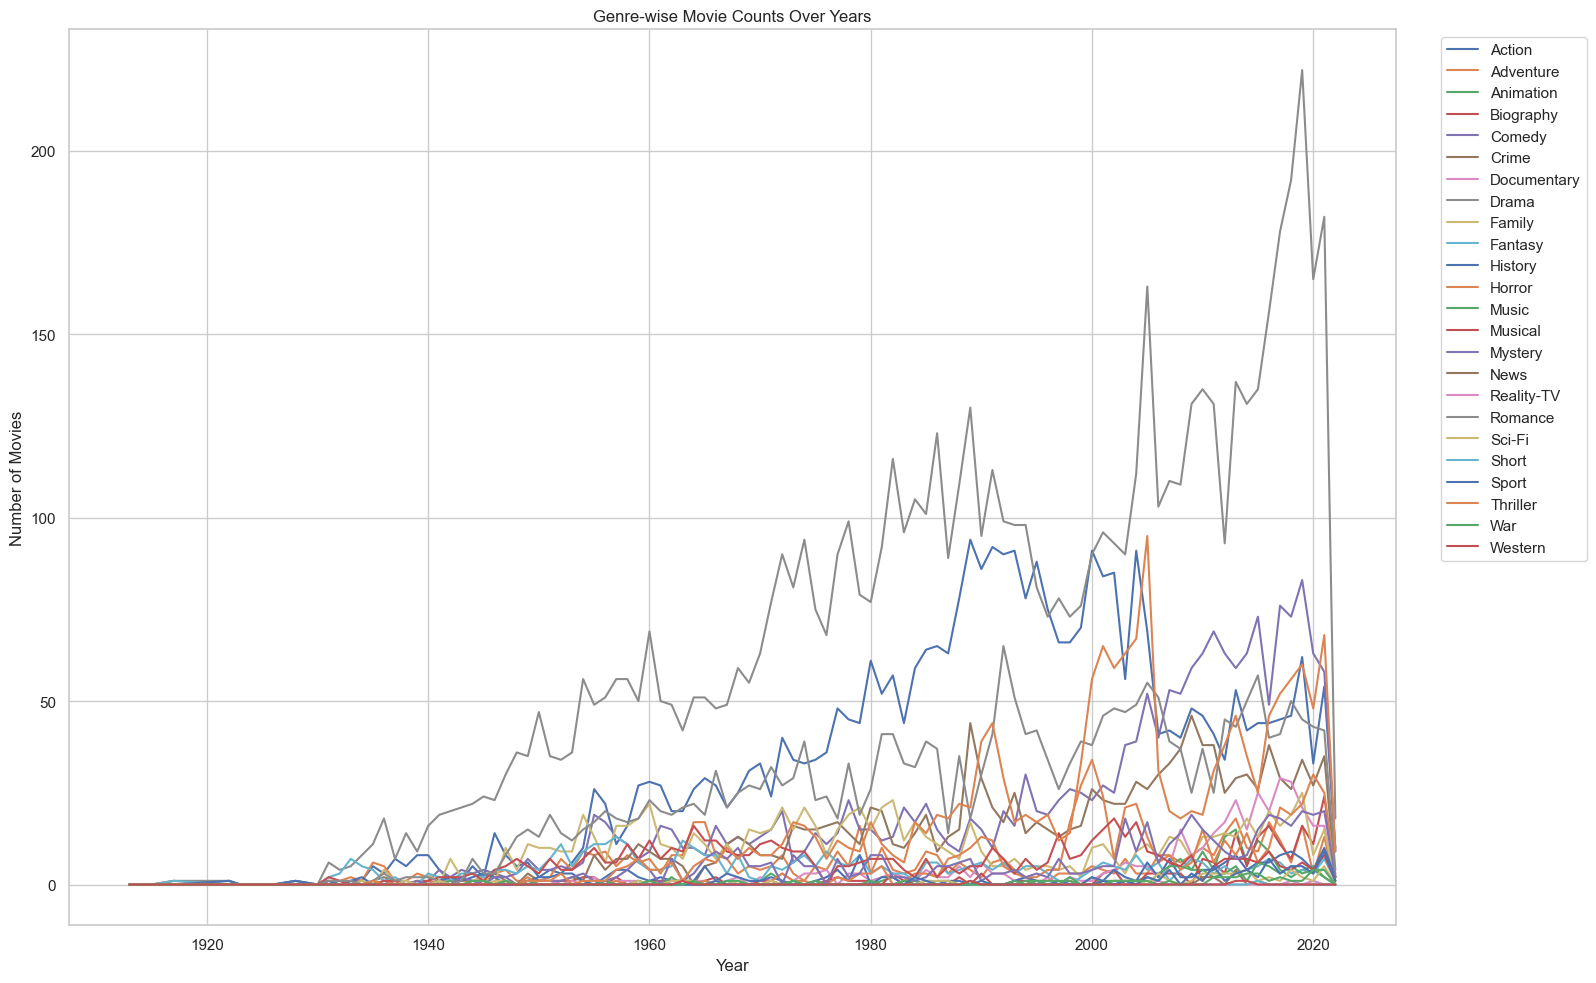

C:\Users\Ashish.Pandit\AppData\Local\Temp\ipykernel_36060\2562351665.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



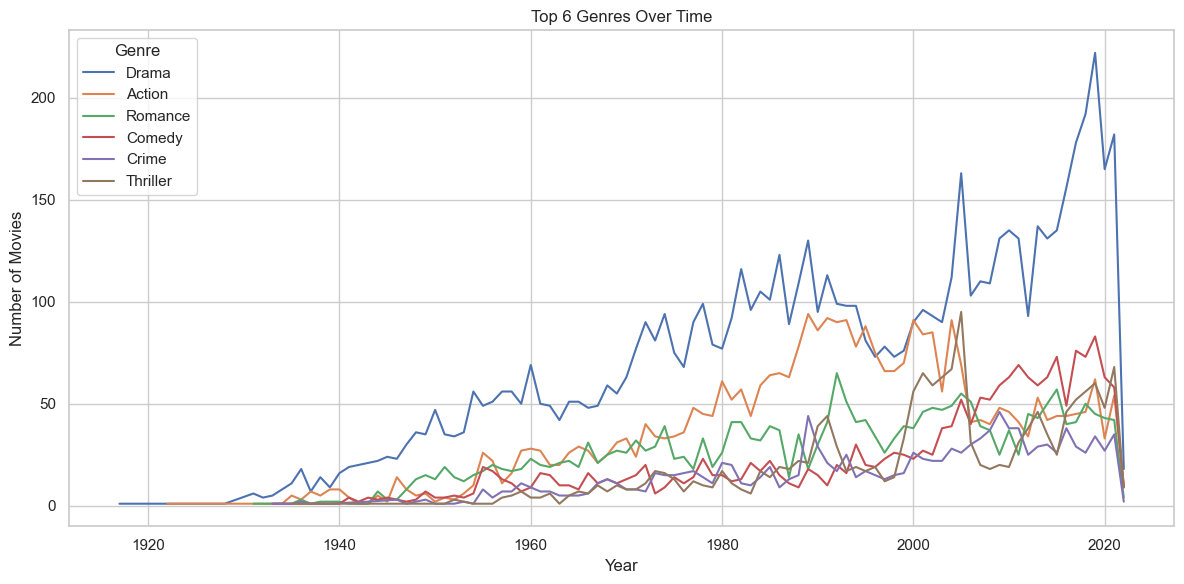

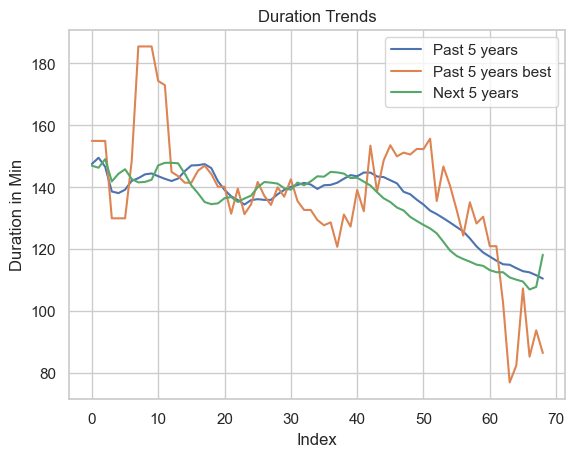

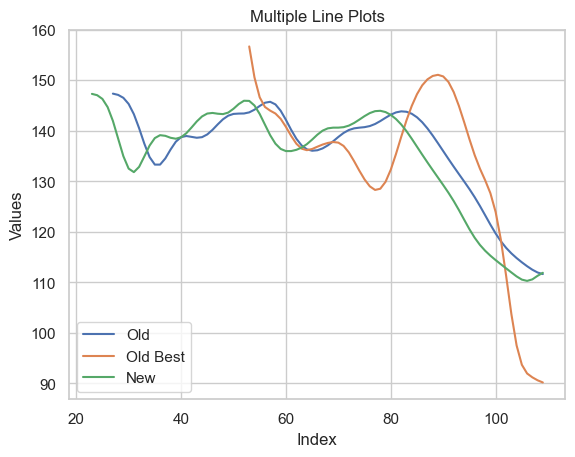

In [29]:
draw_year_duration_heatmap()
draw_all_genre_vs_year()
draw_genre_trends(movies)
duration_trend_df=draw_graph_for_duration_trends()
draw_smoothed_graph_for_duration_trends(duration_trend_df)